In [1]:
import pandas
import seaborn
import matplotlib
import sklearn.impute
import sklearn.neighbors
import sklearn.feature_selection

%matplotlib inline

# Instructions

- Read the data from CSV files and properly set the indices


In [2]:
data_train = pandas.read_csv('../data/high_salary_roll.train.csv').set_index('id')
data_train

,social-security-number,house-number,age-group,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country-code,native-country,label
id,,,,,,,,,,,,,,,,,,
2103,522215230.0,9013.0,2.0,self-emp-not-inc,335549.0,prof-school,15.0,never-married,prof-specialty,not-in-family,white,male,0.0,4.0,2.0,USA,united-states,1.0
14649,318423385.0,9914.0,0.0,private,98287.0,hs-grad,9.0,married-civ-spouse,sales,husband,white,male,0.0,0.0,3.0,USA,united-states,0.0
7379,782174708.0,3577.0,2.0,self-emp-not-inc,127740.0,hs-grad,9.0,married-civ-spouse,exec-managerial,husband,white,male,0.0,0.0,4.0,USA,united-states,0.0
24479,835376302.0,1222.0,2.0,self-emp-not-inc,48553.0,some-college,10.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,3.0,USA,united-states,0.0
19532,956246482.0,3026.0,3.0,private,403061.0,1st-4th,2.0,never-married,machine-op-inspct,other-relative,white,female,0.0,0.0,2.0,MEX,mexico,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,589347218.0,2426.0,0.0,private,42706.0,some-college,10.0,never-married,prof-specialty,not-in-family,white,male,0.0,0.0,2.0,USA,united-states,0.0
2192,304709273.0,7409.0,2.0,local-gov,103759.0,some-college,10.0,married-civ-spouse,transport-moving,husband,white,male,2.0,0.0,2.0,USA,united-states,0.0
8250,939518634.0,450.0,0.0,private,316184.0,hs-grad,9.0,never-married,other-service,other-relative,black,male,0.0,0.0,2.0,USA,united-states,0.0


In [3]:
data_test = pandas.read_csv('../data/high_salary_roll.test.csv').set_index('id')
data_test

,social-security-number,house-number,age-group,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country-code,native-country,label
id,,,,,,,,,,,,,,,,,,
12849,150854577.0,249.0,1.0,private,509500.0,bachelors,13.0,never-married,tech-support,not-in-family,white,female,2.0,0.0,2.0,USA,united-states,1.0
1460,437726609.0,1112.0,0.0,private,243368.0,preschool,1.0,never-married,farming-fishing,not-in-family,white,male,0.0,0.0,3.0,MEX,mexico,0.0
13594,773047413.0,7773.0,2.0,private,144524.0,hs-grad,9.0,divorced,machine-op-inspct,unmarried,black,female,0.0,0.0,2.0,USA,united-states,0.0
14400,129868067.0,2169.0,3.0,private,150975.0,hs-grad,9.0,divorced,machine-op-inspct,not-in-family,amer-indian-eskimo,female,NaN,0.0,2.0,USA,united-states,0.0
14333,366393165.0,2958.0,2.0,private,136419.0,hs-grad,9.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,3.0,USA,united-states,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,469155865.0,6547.0,1.0,private,346736.0,assoc-acdm,12.0,never-married,exec-managerial,own-child,white,female,0.0,0.0,3.0,USA,united-states,0.0
2952,107681134.0,1445.0,2.0,private,54422.0,assoc-acdm,12.0,married-civ-spouse,prof-specialty,wife,white,female,0.0,0.0,2.0,USA,united-states,1.0
9470,451622145.0,1985.0,4.0,state-gov,124971.0,doctorate,16.0,married-civ-spouse,prof-specialty,husband,white,male,0.0,0.0,2.0,NaN,NaN,1.0


# Instructions

- Select any two features from these three features
    - Note that both train and test data should have a same features
- Use the following code snippet to visualize both features and labels on both data sets

```
axis = matplotlib.pyplot.axes(projection='3d')
axis.scatter(
    data['feature_1'],
    data['feature_2'],
    data['feature_3'],
    c = data['label'],
    s = 1,
    cmap = 'PiYG',
)

axis.view_init(10, 30)
```


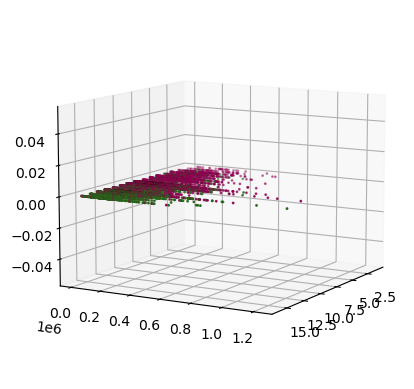

In [4]:
axis = matplotlib.pyplot.axes(projection='3d')
axis.scatter(
    data_train['education-num'],
    data_train['fnlwgt'],
    
    c = data_train['label'],
    s = 1,
    cmap = 'PiYG',
)

axis.view_init(10, 30)

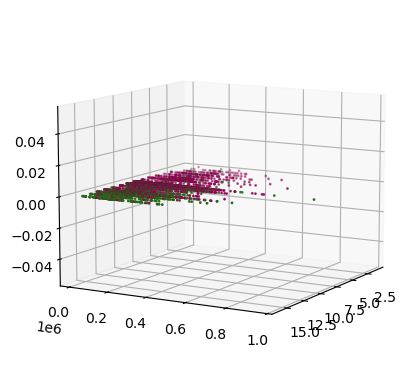

In [5]:
axis = matplotlib.pyplot.axes(projection='3d')
axis.scatter(
    data_test['education-num'],
    data_test['fnlwgt'],
    
    c = data_test['label'],
    s = 1,
    cmap = 'PiYG',
)

axis.view_init(10, 30)

# Instruction

- Define a `sklearn.neighbors.KNeighborsClassifier` model with the following configurations to be used as an estimator
```
        n_neighbors = 5,
        weights     = 'uniform', 
        p           = 2, 
```
    
- Use `sklearn.feature_selection.SequentialFeatureSelector` with the following configurations for automatic feature selection

```
        estimator            = model,
        n_features_to_select = 2,
        direction            = 'backward'

```

- Now, fit the feature selector to the training data


In [6]:
model = sklearn.neighbors.KNeighborsClassifier(
        n_neighbors = 2,
        weights = 'uniform', 
        p= 2, 
)
model

KNeighborsClassifier(n_neighbors=2)

In [7]:
feature_selection = sklearn.feature_selection.SequentialFeatureSelector(
        estimator= model,
        n_features_to_select = 2,
        direction= 'backward'
)
feature_selection

SequentialFeatureSelector(direction='backward',
                          estimator=KNeighborsClassifier(n_neighbors=2),
                          n_features_to_select=2)

In [8]:
data_train.dtypes

social-security-number    float64
house-number              float64
age-group                 float64
workclass                  object
fnlwgt                    float64
education                  object
education-num             float64
marital-status             object
occupation                 object
relationship               object
race                       object
sex                        object
capitalgain               float64
capitalloss               float64
hoursperweek              float64
native-country-code        object
native-country             object
label                     float64
dtype: object

In [9]:
data_train.isna().sum(axis='index')

social-security-number     11
house-number               18
age-group                   6
workclass                 792
fnlwgt                     16
education                  15
education-num              12
marital-status             20
occupation                791
relationship               14
race                       13
sex                        14
capitalgain                17
capitalloss                14
hoursperweek               18
native-country-code       301
native-country            302
label                       0
dtype: int64

In [20]:
data_train.isnull().sum(axis='index')

social-security-number     11
house-number               18
age-group                   6
workclass                 792
fnlwgt                     16
education                  15
education-num              12
marital-status             20
occupation                791
relationship               14
race                       13
sex                        14
capitalgain                17
capitalloss                14
hoursperweek               18
native-country-code       301
native-country            302
label                       0
dtype: int64

In [19]:
feature_selection.fit(
    X=data_train.drop(['label'], axis='columns'),
    y=data_train['label'],
)

ValueError: could not convert string to float: 'self-emp-not-inc'

# Instruction
- Use `.get_feature_names_out()` to get the optimal subset of features from the feature selector
- Create `pandas.DataFrame`s that contain only those selected features for training data and test data respectively 

In [ ]:
selected_features = feature_selection.get_feature_names_out().tolist()
selected_features

In [ ]:
data_train_feature_selected = data_train[selected_features + ['label']]
data_train_feature_selected

In [ ]:
data_test_feature_selected = data_test[selected_features + ['label']]
data_test_feature_selected

# Instruction

- Plot `seaborn.scatterplot` using the selected features with `label` as `hue`

In [ ]:
seaborn.scatterplot(
    data = data_train_feature_selected,
    x ='feature_2',
    y ='feature_3',
    hue = 'label',
)

In [ ]:
seaborn.scatterplot(
    data = data_test_feature_selected,
    x ='feature_2',
    y ='feature_3',
    hue = 'label',
)

# Instructions

- Simply write the train data set to `./data/features.train.csv`
- Simply write the test data set to `./data/features.test.csv`


In [ ]:
data_train_feature_selected.to_csv('./data/features.train.csv')

In [ ]:
data_test_feature_selected.to_csv('./data/features.test.csv')